In [ ]:
try:
    from pycaret import show_versions
except ModuleNotFoundError:
    !pip install pycaret-ts-alpha
    from pycaret import show_versions

show_versions()

In [ ]:
!pip install plotly-express

In [ ]:
exit()#RESTART RUN TIME 

In [ ]:
import pandas as pd
from datetime import datetime,date
import matplotlib
import matplotlib_inline
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import numpy as np
from pycaret.time_series import TSForecastingExperiment

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/NewExcellData.xlsx")
data

,Orderdate,salesValue,ItemsQty,DeliverysalesValue,DeliveryitemsQty,OfferSales,TimePerorder
0,2022-02-24 16:23:54,122.5,4.25,0.0,0.0,0.0,5.0
1,2022-01-17 21:13:47,35.0,1.00,0.0,0.0,0.0,5.0
2,2022-03-11 20:54:27,157.5,7.00,0.0,0.0,0.0,5.0
3,2022-02-02 16:57:59,85.0,2.00,0.0,0.0,0.0,5.0
4,2022-02-03 17:47:44,100.0,1.00,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...
829489,2022-04-30 18:30:16,55.0,1.00,0.0,0.0,0.0,5.0
829490,2022-02-23 11:06:40,60.0,2.00,0.0,0.0,60.0,5.0
829491,2022-01-21 15:08:45,40.0,2.00,0.0,0.0,0.0,5.0
829492,2022-04-29 23:23:03,30.0,3.00,0.0,0.0,0.0,5.0


In [ ]:
data['Orderdate'] = pd.to_datetime(data['Orderdate']).dt.date
data

,Orderdate,salesValue,ItemsQty,DeliverysalesValue,DeliveryitemsQty,OfferSales,TimePerorder
0,2022-02-24,122.5,4.25,0.0,0.0,0.0,5.0
1,2022-01-17,35.0,1.00,0.0,0.0,0.0,5.0
2,2022-03-11,157.5,7.00,0.0,0.0,0.0,5.0
3,2022-02-02,85.0,2.00,0.0,0.0,0.0,5.0
4,2022-02-03,100.0,1.00,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...
829489,2022-04-30,55.0,1.00,0.0,0.0,0.0,5.0
829490,2022-02-23,60.0,2.00,0.0,0.0,60.0,5.0
829491,2022-01-21,40.0,2.00,0.0,0.0,0.0,5.0
829492,2022-04-29,30.0,3.00,0.0,0.0,0.0,5.0


In [ ]:
data = data.groupby(['Orderdate'])['salesValue'].sum()
data

Orderdate
2022-01-01    160390.000
2022-01-02    194162.500
2022-01-03    174497.500
2022-01-04    181170.000
2022-01-05    194115.000
                 ...    
2022-05-18    375498.000
2022-05-19    224649.500
2022-05-20    238751.375
2022-05-21    202578.875
2022-05-22     68068.750
Name: salesValue, Length: 142, dtype: float64

In [ ]:
data=pd.DataFrame(data)

In [ ]:
data =data.reset_index()

In [ ]:
data

,Orderdate,salesValue
0,2022-01-01,160390.000
1,2022-01-02,194162.500
2,2022-01-03,174497.500
3,2022-01-04,181170.000
4,2022-01-05,194115.000
...,...,...
137,2022-05-18,375498.000
138,2022-05-19,224649.500
139,2022-05-20,238751.375
140,2022-05-21,202578.875


In [ ]:
data = data.drop("Orderdate", axis=1, inplace=False)
data

,salesValue
0,160390.000
1,194162.500
2,174497.500
3,181170.000
4,194115.000
...,...
137,375498.000
138,224649.500
139,238751.375
140,202578.875


<AxesSubplot:>

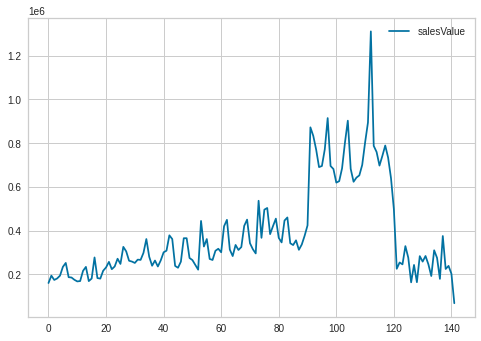

In [ ]:
data.plot()

In [ ]:
eda = TSForecastingExperiment()

In [ ]:
#### Create Time Series Forecasting Experiment ----
fig_kwargs={'renderer': 'colab'}
exp = TSForecastingExperiment()
global_plot_settings = {"renderer": "colab"}
exp.setup(data=data,target=None,  seasonal_period=1, fh=20, fig_kwargs=global_plot_settings, session_id=42 )

,Description,Value
0,session_id,42
1,Target,salesValue
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(142, 1)"
5,Train data shape,"(122, 1)"
6,Test data shape,"(20, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize...,1.244556e+05,1.674286e+05,0.2294,0.2237,2.6279,2.3595,-1.116000e-01,0.1533
ets,ETS,1.286934e+05,1.721463e+05,0.2238,0.2289,2.7032,2.4258,-1.779000e-01,0.0433
exp_smooth,Exponential Smoothing,1.305799e+05,1.764534e+05,0.2236,0.2325,2.7430,2.4933,-2.505000e-01,0.0367
auto_arima,Auto ARIMA,1.309124e+05,1.704481e+05,0.2348,0.2352,2.7618,2.4027,-1.541000e-01,0.4867
theta,Theta Forecaster,1.337295e+05,1.803932e+05,0.2283,0.2397,2.8136,2.5552,-3.194000e-01,0.0467
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,1.391571e+05,1.790066e+05,0.2361,0.2459,2.9011,2.5080,-2.495000e-01,0.0333
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize...,1.391571e+05,1.790066e+05,0.2361,0.2459,2.9011,2.5080,-2.495000e-01,0.0333
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,1.391571e+05,1.790066e+05,0.2361,0.2459,2.9011,2.5080,-2.495000e-01,0.0367
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasona...,1.391571e+05,1.790066e+05,0.2361,0.2459,2.9011,2.5080,-2.495000e-01,0.0333
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,1.391571e+05,1.790066e+05,0.2361,0.2459,2.9011,2.5080,-2.495000e-01,0.0333


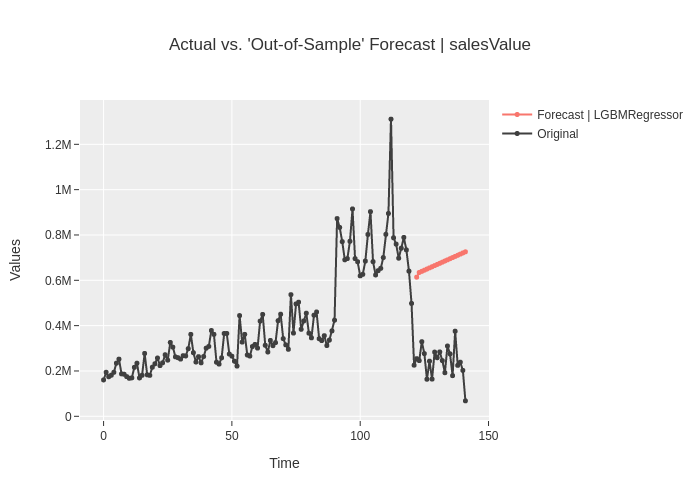

In [ ]:
best_baseline = exp.compare_models()
exp.plot_model(best_baseline,fig_kwargs={'renderer': 'png'})

In [ ]:
baseline_models = exp.compare_models(n_select=3)

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize...,1.244556e+05,1.674286e+05,0.2294,0.2237,2.6279,2.3595,-1.116000e-01,0.0367
ets,ETS,1.286934e+05,1.721463e+05,0.2238,0.2289,2.7032,2.4258,-1.779000e-01,0.0400
exp_smooth,Exponential Smoothing,1.305799e+05,1.764534e+05,0.2236,0.2325,2.7430,2.4933,-2.505000e-01,0.0367
auto_arima,Auto ARIMA,1.309124e+05,1.704481e+05,0.2348,0.2352,2.7618,2.4027,-1.541000e-01,0.4900
theta,Theta Forecaster,1.337295e+05,1.803932e+05,0.2283,0.2397,2.8136,2.5552,-3.194000e-01,0.0467
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,1.391571e+05,1.790066e+05,0.2361,0.2459,2.9011,2.5080,-2.495000e-01,0.0333
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize...,1.391571e+05,1.790066e+05,0.2361,0.2459,2.9011,2.5080,-2.495000e-01,0.0333
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,1.391571e+05,1.790066e+05,0.2361,0.2459,2.9011,2.5080,-2.495000e-01,0.0333
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasona...,1.391571e+05,1.790066e+05,0.2361,0.2459,2.9011,2.5080,-2.495000e-01,0.0333
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,1.391571e+05,1.790066e+05,0.2361,0.2459,2.9011,2.5080,-2.495000e-01,0.0333


In [ ]:
#### Step 3B: Perform hyperparameter tuning on the best baseline models ----
tuned_baseline_models = [exp.tune_model(model) for model in baseline_models]

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,61.0,62032.6150,69850.5656,0.1624,0.1594,1.5786,1.2352,0.1058
1,81.0,174995.9618,211673.1459,0.2831,0.3105,3.7239,3.1310,-0.1426
2,101.0,136277.3187,219005.7867,0.2684,0.1922,2.5582,2.6447,-0.2610
Mean,NaN,124435.2985,166843.1661,0.2380,0.2207,2.6202,2.3370,-0.0993
SD,NaN,46871.1319,68649.4250,0.0538,0.0649,0.8769,0.8040,0.1528


In [ ]:
#### Step 3C: Blend the tuned models into 1 composite estimator ----
# If performance of blender is not better than the individual 
# models then choose the best individual model
blender = exp.blend_models(tuned_baseline_models, method='median', choose_better=True)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,61.0,60564.7360,71094.1463,0.1533,0.1556,1.5412,1.2572,0.0736
1,81.0,187055.6394,226189.8940,0.2968,0.3345,3.9805,3.3458,-0.3047
2,101.0,125483.3891,205132.3213,0.2369,0.1799,2.3556,2.4772,-0.1063
Mean,NaN,124367.9215,167472.1205,0.2290,0.2234,2.6258,2.3600,-0.1124
SD,NaN,51645.7185,68689.5954,0.0589,0.0792,1.0140,0.8567,0.1545


In [ ]:
# Finalize the model if happy with the results.
# This trains the model on the entire dataset now
final_model = exp.finalize_model(blender)

In [ ]:
#### Step 3D: Check predictions ----
exp.plot_model(blender)

In [ ]:
exp.predict_model(blender,fh=25)

,y_pred
122,298387.8172
123,302303.8762
124,306271.3297
125,310290.8524
126,314363.1274
127,318488.8473
128,322668.7133
129,326903.4362
130,331193.7358
131,335540.3415


In [ ]:
exp.plot_model(blender, plot = 'forecast', data_kwargs = {'fh': 25})